In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
# Load the dataset
data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'])
# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)

In [4]:
data

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [5]:
data.dropna(inplace = True)

In [6]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(data['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

ADF Statistic: -2.25699035004723
p-value: 0.18621469116587275
Critical Values:
1% : -3.4476305904172904
5% : -2.869155980820355
10% : -2.570827146203181


In [7]:
# Create a new column for the month
data['Month'] = data.index.month

# Calculate the average value for each month across all years
monthly_avg = data.groupby('Month')['Value'].mean()

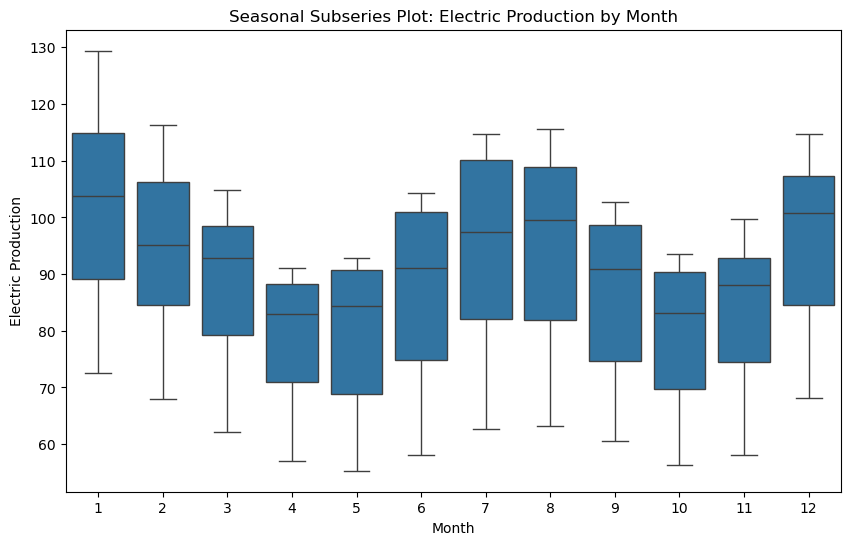

In [9]:
import seaborn as sns
# Create a seasonal subseries plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Month'], y=data['Value'])
plt.xlabel('Month')
plt.ylabel('Electric Production')
plt.title('Seasonal Subseries Plot: Electric Production by Month')
plt.show()

<Figure size 1000x600 with 0 Axes>

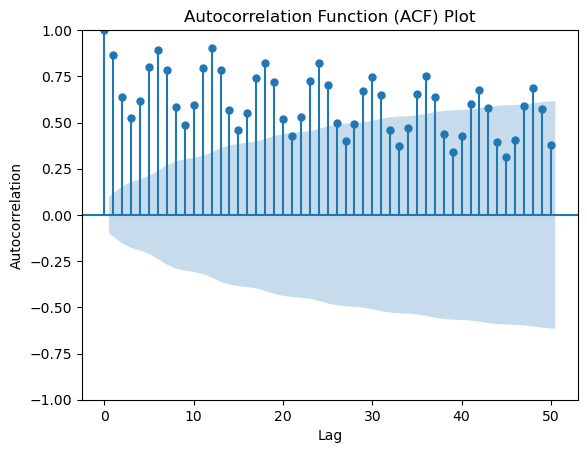

<Figure size 1000x600 with 0 Axes>

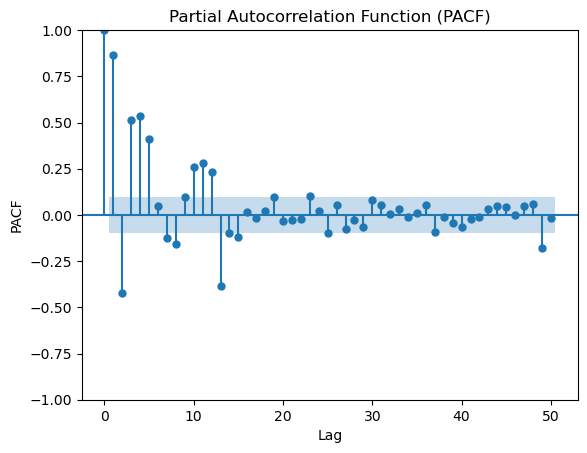

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
# Generate the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(data['Value'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf

# Calculate the PACF
plt.figure(figsize=(10, 6))
plot_pacf(data['Value'], lags =50)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

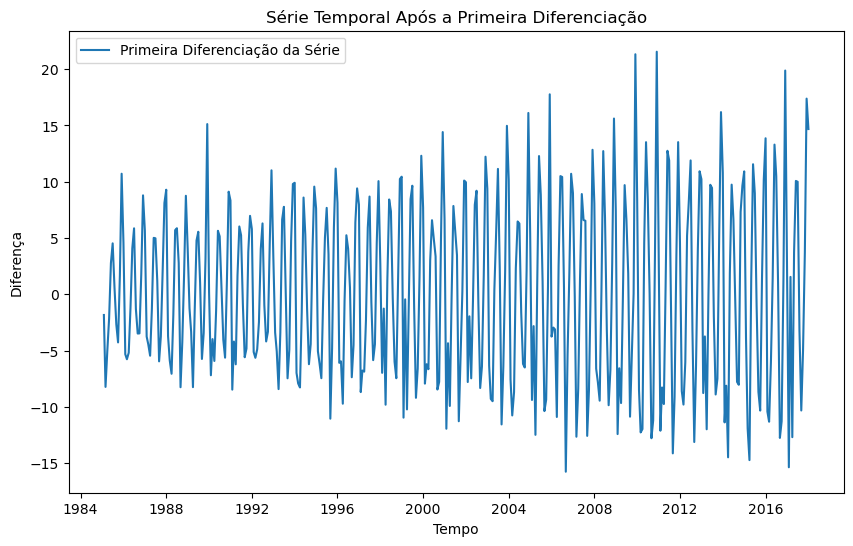


Resultados do Teste ADF na Primeira Diferenciação:
ADF Statistic: -7.104890882267298
p-value: 4.077786565539737e-10
Critical Values:
1%: -3.4476305904172904
5%: -2.869155980820355
10%: -2.570827146203181


In [14]:
# Supondo que seus dados já estão carregados no DataFrame 'data'

# Aplicar a primeira diferenciação
data['Value_diff1'] = data['Value'].diff()

# Remover NaN da série diferenciada ANTES de plotar e testar
data_diff1_clean = data['Value_diff1'].dropna()

# Plotar a série diferenciada
plt.figure(figsize=(10, 6))
plt.plot(data.index[1:], data_diff1_clean, label='Primeira Diferenciação da Série') # Ajuste no índice para corresponder aos dados limpos
plt.title('Série Temporal Após a Primeira Diferenciação')
plt.xlabel('Tempo')
plt.ylabel('Diferença')
plt.legend()
plt.show()

# Realizar o Teste ADF na série diferenciada *APLICANDO dropna() DIRETAMENTE*
result_diff1 = adfuller(data_diff1_clean)
print('\nResultados do Teste ADF na Primeira Diferenciação:')
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])
print('Critical Values:')
for key, value in result_diff1[4].items():
    print(f'{key}: {value}')

# Se a primeira diferenciação não tornar a série estacionária,
# você pode tentar uma segunda diferenciação:
# data['Value_diff2'] = data_diff1_clean.diff().dropna()
# E repetir o Teste ADF na 'Value_diff2'

Resultados do Teste ADF na Série Original:
ADF Statistic: -2.25699035004723
p-value: 0.18621469116587275
Valores Críticos:
1%: -3.4476305904172904
5%: -2.869155980820355
10%: -2.570827146203181

Resultados do Teste ADF após 1ª Diferenciação:
ADF Statistic: -7.104890882267298
p-value: 4.077786565539737e-10
Valores Críticos:
1%: -3.4476305904172904
5%: -2.869155980820355
10%: -2.570827146203181

A série se tornou estacionária após 1 diferenciações.


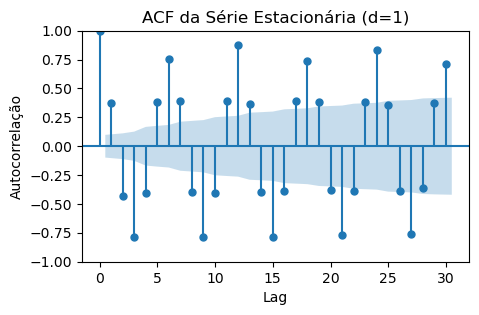

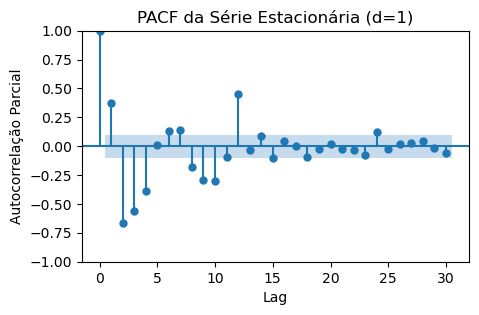


Analise os gráficos ACF e PACF para determinar as ordens p e q do modelo ARIMA.
O valor de d (ordem de integração) é: 1


In [22]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Supondo que seus dados já estejam carregados no DataFrame chamado 'data'
# e que a coluna com os valores da série seja 'Value'

# 1. Verificar se a série original é estacionária
result_adf_original = adfuller(data['Value'].dropna()) # Aplicar dropna() aqui também por precaução
print('Resultados do Teste ADF na Série Original:')
print('ADF Statistic:', result_adf_original[0])
print('p-value:', result_adf_original[1])
print('Valores Críticos:')
for key, value in result_adf_original[4].items():
    print(f'{key}: {value}')

# 2. Diferenciar a série até torná-la estacionária
data['Value_diff'] = data['Value'].copy() # Inicializar com uma cópia
d = 0
while result_adf_original[1] > 0.05:
    data['Value_diff'] = data['Value_diff'].diff()
    data_diff_dropna = data['Value_diff'].dropna() # Remover NaN ANTES do teste
    result_adf_original = adfuller(data_diff_dropna)
    d += 1
    print(f'\nResultados do Teste ADF após {d}ª Diferenciação:')
    print('ADF Statistic:', result_adf_original[0])
    print('p-value:', result_adf_original[1])
    print('Valores Críticos:')
    for key, value in result_adf_original[4].items():
        print(f'{key}: {value}')
    if d > 5: # Adicionar uma condição de saída para evitar loops infinitos
        print("A série pode não se tornar estacionária dentro do limite de diferenciações.")
        break

print(f'\nA série se tornou estacionária após {d} diferenciações.')

# 3. Plotar ACF e PACF da série estacionária
plt.figure(figsize=(5, 3))
plot_acf(data['Value_diff'].dropna(), lags=30, ax=plt.gca()) # Aplicar dropna() antes de plotar
plt.title('ACF da Série Estacionária (d=' + str(d) + ')')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.show()

plt.figure(figsize=(5, 3))
plot_pacf(data['Value_diff'].dropna(), lags=30, method='ywmle', ax=plt.gca()) # Aplicar dropna() antes de plotar
plt.title('PACF da Série Estacionária (d=' + str(d) + ')')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação Parcial')
plt.show()

print('\nAnalise os gráficos ACF e PACF para determinar as ordens p e q do modelo ARIMA.')
print('O valor de d (ordem de integração) é:', d)

C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Elzilane Barreto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


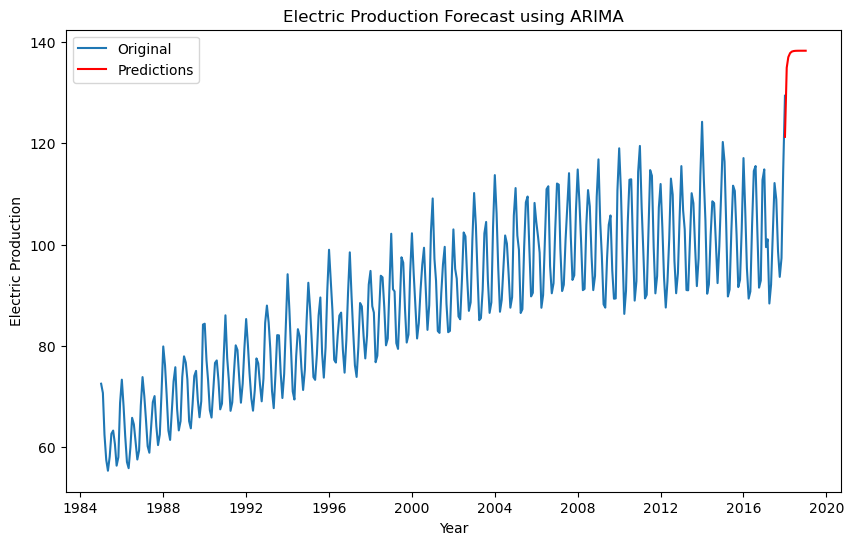

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  397
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1342.919
Date:                Mon, 12 May 2025   AIC                           2689.838
Time:                        00:54:54   BIC                           2697.801
Sample:                    01-01-1985   HQIC                          2692.993
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3772      0.056      6.683      0.000       0.267       0.488
sigma2        51.6325      4.211     12.261      0.000      43.379      59.886
===================================================================================
Ljung-Box (L1) (Q):                  24.80   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.00   Prob(JB):                         0.19
Heteroskedasticity (H):               2.82   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Value'], order=(1, 1, 0))
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.predict(start=data.index[-1], end=data.index[-1] + pd.DateOffset(months=12))

# Visualize the original time series and the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecast using ARIMA')
plt.legend()
plt.show()

model_summary = fitted_model.summary()
model_summary